Saving orientation_map_dense.txt to orientation_map_dense (3).txt
Archivo cargado: orientation_map_dense (3).txt
Forma de la matriz: (53, 34)


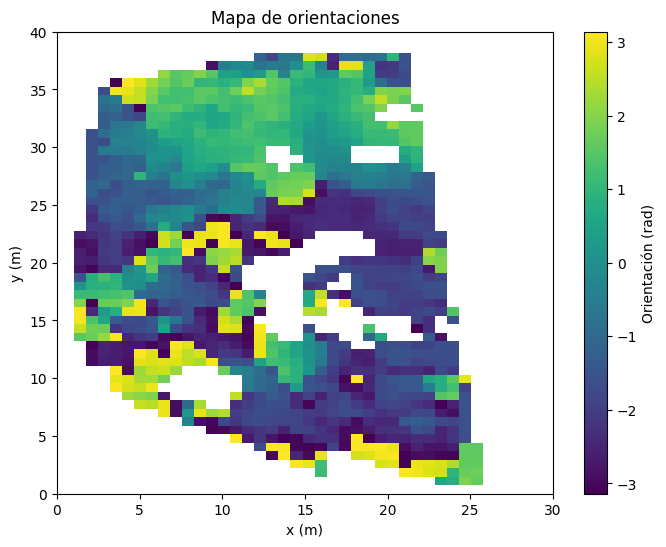

In [ ]:
# Subir archivo
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]
print("Archivo cargado:", filename)

with open(filename, "r") as f:
    lines = f.readlines()

x_line = None
y_line = None
header_end = 0

for i, line in enumerate(lines):
    if "x-values" in line:
        x_line = line.split(":")[1]
    if "y-values" in line:
        y_line = line.split(":")[1]
    if x_line is not None and y_line is not None:
        header_end = i + 1
        break

x = np.array([float(v) for v in x_line.split(",")])
y = np.array([float(v) for v in y_line.split(",")])


# matriz de orientación

data = np.loadtxt(filename, skiprows=header_end)

print("Forma de la matriz:", data.shape)


mpl.rcParams['text.usetex'] = False

# 5. Graficar

plt.figure(figsize=(8, 6))

plt.imshow(
    np.ma.masked_invalid(data),
    extent=[x.min(), x.max(), y.min(), y.max()],
    origin="lower",
    aspect="auto"
)

plt.colorbar(label="Orientación (rad)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim(0, 30)
plt.ylim(0, 40)
plt.title("Mapa de orientaciones")
plt.show()
